In [1]:
from google.colab import files

uploaded = files.upload()
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name = fn, length = len(uploaded[fn])
    ))

Saving result.txt to result.txt
User uploaded file "result.txt" with length 9336 bytes


In [2]:
import re

data = []
f = open("result.txt", 'r')
while True:
    line = f.readline()
    if not line: break
    temp = re.split('[%\n:->- ]', line)
    while '' in temp: temp.remove('')
    data.append(temp)
f.close()

In [3]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display

df = pd.DataFrame(data, columns = ['Cache', 'Write', 'Replace', 'Program', 
                                   'Return', 'Instruction', 'Memory', 'Register', 
                                   'Branch Taken', 'Branch Hit', 'Branch Miss', 'Jump', 
                                   'Cache Hit', 'Cache Miss', 'Cache Ratio', 'Cache Total'])

df = df.reset_index().set_index('Program')
df.pop('index')

df.to_csv('result.csv')
df.drop(['Return', 'Instruction', 'Register', 
         'Branch Taken', 'Branch Hit', 'Branch Miss', 'Jump'], inplace=True, axis=1)

df = df[['Cache', 'Write', 'Replace', 'Memory', 'Cache Hit', 'Cache Miss', 'Cache Ratio', 'Cache Total']]
df.to_csv("cache.csv")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

width = 0.15
fig, ax = plt.subplots(figsize=(15,6))

x = np.arange(6)


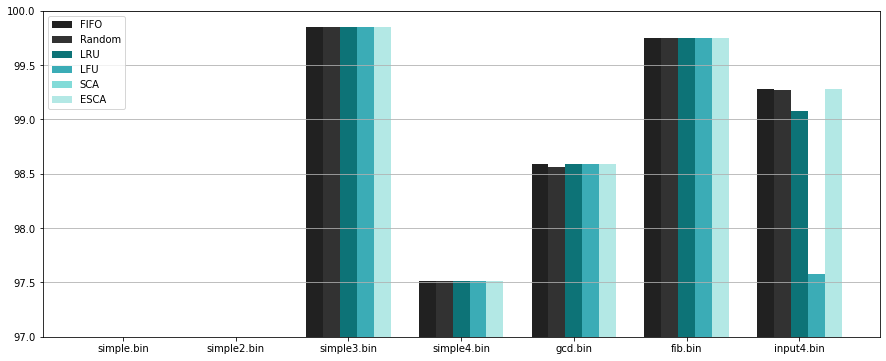

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import random


width = 0.15
x = np.arange(7)
fig, ax = plt.subplots(figsize=(15,6))
program = np.array(['simple.bin', 'simple2.bin', 'simple3.bin', 'simple4.bin', 'gcd.bin', 'fib.bin', 'input4.bin'])

way = ['4 Way', '8 Way', '16 Way']
write = ['Write Through', 'Write Back']
block = ['1KB', '4KB', '16KB', '64KB', '256KB']
replace = ['FIFO', 'Random', 'LRU', 'LFU', 'SCA', 'ESCA']
cache = ['Fully Associative', 'Direct Mapped', 'Set Assocciative']

way4 = [100 - i for i in [83.333, 87.5, 99.847, 97.512, 98.58364, 99.746, 98.95844]]
way8 = [100 - i for i in [83.333, 87.5, 99.847, 97.512, 98.64467, 99.746, 99.04089]]
way16 = [100 - i for i in [83.333, 87.2685, 99.16106, 97.64172, 98.57861, 99.68794, 99.14333]]

block1 = [55/109, 54/109, 67/109, 55/109, 79/109, 79/109]
block4 = [869/2029699, 2028830/2029699, 2028049/2029699, 2028761/2029699, 2028770/2029699, 2028786/2029699]
block16 = [869/2029699, 2028830/2029699, 2028049/2029699, 2028761/2029699, 2028770/2029699, 2028786/2029699]
block64 = [869/2029699, 2028830/2029699, 2028049/2029699, 2028761/2029699, 2028770/2029699, 2028786/2029699]
block256 = [869/2029699, 2028830/2029699, 2028049/2029699, 2028761/2029699, 2028770/2029699, 2028786/2029699]

writeT = [1, 2, 206, 41, 153, 494, 1026130]
writeB = [0, 0, 34.77777778, 0, 4, 0, 59196.33333]

FIFO = [i for i in [83.333, 87.5, 99.847, 97.512, 98.58833333, 99.746, 99.27533333]]
Random = [i for i in [83.333, 87.5, 99.847, 97.512, 98.56016667, 99.746, 99.27166667]]
LRU = [i for i in [83.333, 87.5, 99.847, 97.512, 98.58833333, 99.746, 99.079]]
LFU = [i for i in [83.333, 87.5, 99.847, 97.512, 98.58833333, 99.746, 97.574]]
SCA = [i for i in [83.333, 87.5, 99.847, 97.512, 98.58833333, 99.746, 99.27533333]]
ESCA = [i for i in [83.333, 87.5, 99.847, 97.512, 98.58833333, 99.746, 99.27533333]]

FAC = [i for i in [83.333, 87.5, 99.847, 97.512, 98.701, 99.746, 99.16366667]]
DMC = [i for i in [83.333, 87.5, 99.847, 97.512, 98.532, 99.746, 98.291]]
SAC = [i for i in [83.333, 87.5, 99.847, 97.512, 98.51791667, 99.746, 99.42066667]]

colors = ['#212121', '#323232', '#0D7377', '#3BACB6', '#82DBD8', '#B3E8E5']

# Ways
# plt.title("Cache Miss Ratio In Multiple Ways")
# plt.plot(x, way4, color=colors[0], label=way[0])
# plt.plot(x, way8, color=colors[2], label=way[1])
# plt.plot(x, way16, color=colors[4], label=way[2])

# Cache
# plt.title("Cache Miss Ratio in Multiple Caches")
# plt.bar(x, DMC, width, alpha=1, color=colors[0], label=cache[1])
# plt.bar(x + width, SAC, width, alpha=1, color=colors[2], label=cache[2])
# plt.bar(x + width * 2, FAC, width, alpha=1, color=colors[4], label=cache[0])
# plt.xticks(np.arange(width, 7 + width * 2, 1), program)
# plt.ylim([97, 100])

# Write Policy
# plt.title("Number of Memory Access in Multiple Wite Policy")
# plt.bar(x, writeT, width, alpha=1, color=colors[0], label=write[0])
# plt.bar(x + width, writeB, width, alpha=1, color=colors[2], label=write[1])
# plt.xticks(np.arange(width, 7 + width * 2, 1), program)

# Cache Algorithm
# plt.bar(x, FIFO, width, alpha=1, color=colors[0], label=replace[0])
# plt.bar(x + width, Random, width, alpha=1, color=colors[1], label=replace[1])
# plt.bar(x + width * 2, LRU, width, alpha=1, color=colors[2], label=replace[2])
# plt.bar(x + width * 3, LFU, width, alpha=1, color=colors[3], label=replace[3])
# plt.bar(x + width * 4, SCA, width, alpha=1, color=colors[4], label=replace[4])
# plt.bar(x + width * 4, ESCA, width, alpha=1, color=colors[5], label=replace[5])
# plt.xticks(np.arange(width  *2, 7 + width * 2, 1), program)
# plt.ylim([97, 100])

plt.grid(True, axis='y')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from tabulate import tabulate
from IPython.display import display


index = ["ANT", "ALT", "LTP1", "LTP2", "GSH", "LVL2"]
df = pd.DataFrame({"simple3.bin(102)" : ["0.98%", "90.10%", "98.39%", "98.39%", "92.15%","92.15%"],
                   "simple4.bin(10)" : ["10.00%", "90.00%", "80.00%", "80.00%", "20.00%", "20.00%"],
                   "gcd.bin(73)" : ["38.35%", "61.64%", "79.45%", "79.45%", "69.86%", "68.49%"],
                   "fib.bin(109)" : ["50.45%", "49.54%", "61.46%", "50.45%", "72.47%", "72.47%"],
                   "input4.bin(2029699)" : ["0.04%", "99.95%", "99.91%", "99.953%", "99.954%", "99.955%"]},
                  index=index)
print(tabulate(df, headers='keys', tablefmt='pretty'))

+------+------------------+-----------------+-------------+--------------+---------------------+
|      | simple3.bin(102) | simple4.bin(10) | gcd.bin(73) | fib.bin(109) | input4.bin(2029699) |
+------+------------------+-----------------+-------------+--------------+---------------------+
| ANT  |      0.98%       |     10.00%      |   38.35%    |    50.45%    |        0.04%        |
| ALT  |      90.10%      |     90.00%      |   61.64%    |    49.54%    |       99.95%        |
| LTP1 |      98.39%      |     80.00%      |   79.45%    |    61.46%    |       99.91%        |
| LTP2 |      98.39%      |     80.00%      |   79.45%    |    50.45%    |       99.953%       |
| GSH  |      92.15%      |     20.00%      |   69.86%    |    72.47%    |       99.954%       |
| LVL2 |      92.15%      |     20.00%      |   68.49%    |    72.47%    |       99.955%       |
+------+------------------+-----------------+-------------+--------------+---------------------+
